# Ehsan Shaghaei
e.shaghaei@innopolis.university

# Defining my personal functions

In [1]:
DEBUG=True
def log(*logs):
    if DEBUG:
        print(*[">> LOG:\t"]+list(logs))

# Task 1

## Preparation

### Importing Data

In [2]:
# importing data frames
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.mode.chained_assignment = None
truth = pd.read_csv('./task1_dataset_full.csv')
data = pd.read_csv('./task1_dataset.csv')


### Checking few rows, the describtion and datatypes of the imported truth and data

#### Truth:

In [3]:
truth.describe()

,Unnamed: 0,feature1,feature2,feature3
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,27.596811,0.001673,0.638289
std,577.494589,12.187501,0.743767,3.561984
min,0.000000,5.472209,-1.504785,-6.333601
25%,499.750000,17.269386,-0.695849,-2.791988
50%,999.500000,27.294883,0.010418,1.129542
75%,1499.250000,36.942079,0.688257,3.803392
max,1999.000000,57.569537,1.488689,6.219302


In [4]:
types = truth.dtypes
print("Number categorical features in Truth:", sum(types=='object'))
print(types)

Number categorical features in Truth: 1
Unnamed: 0      int64
datetime       object
feature1      float64
feature2      float64
feature3      float64
dtype: object


#### Data:

In [5]:
data.head(-1)



,Unnamed: 0,0,1,2,3
0,0,2017-02-10 07:00:00,25.618887,-0.932839,3.900162
1,1,2017-02-04 20:00:00,28.559832,-1.171867,0.223089
2,2,2017-02-18 16:00:00,31.390287,0.826090,2.069539
3,3,2017-01-15 08:00:00,14.205741,-0.921493,1.207404
4,4,2017-02-09 03:00:00,25.047604,0.294643,4.731710
...,...,...,...,...,...
1994,1994,2017-02-21 12:00:00,31.730069,-1.184285,-2.579240
1995,1995,2017-01-23 10:00:00,20.383428,1.447426,-2.971402
1996,1996,2017-01-17 05:00:00,17.117614,0.252971,0.684403
1997,1997,2017-02-14 17:00:00,NaN,NaN,NaN


In [6]:
data.describe()

,Unnamed: 0,1,2,3
count,2000.000000,1417.000000,1417.000000,1417.000000
mean,999.500000,25.116156,0.073800,0.424997
std,577.494589,10.399268,0.720578,3.683166
min,0.000000,5.226627,-1.430905,-6.218775
25%,499.750000,16.489441,-0.582418,-3.431373
50%,999.500000,25.051147,0.151488,0.935197
75%,1499.250000,32.460457,0.714754,3.726296
max,1999.000000,55.008359,1.447426,6.176594


In [7]:
types = data.dtypes
print("Number categorical features in data:", sum(types=='object'))
print(types)

Number categorical features in data: 1
Unnamed: 0      int64
0              object
1             float64
2             float64
3             float64
dtype: object


### Dropping unnessasary columns   **RUN THIS CELL ONLY ONCE AFTER LOADING DATA**

In [8]:
log(truth.columns)
truth.drop(truth.columns[0],axis=1,inplace=True)
truth.head()


>> LOG:	 Index(['Unnamed: 0', 'datetime', 'feature1', 'feature2', 'feature3'], dtype='object')


,datetime,feature1,feature2,feature3
0,2017-01-01 00:00:00,8.737265,-0.162467,-0.162467
1,2017-01-01 01:00:00,7.805001,-0.238704,-0.199435
2,2017-01-01 02:00:00,6.497439,-0.136618,-0.058081
3,2017-01-01 03:00:00,9.309663,-0.305614,-0.187816
4,2017-01-01 04:00:00,5.684680,0.564779,0.721833


In [9]:
log(data.columns)
data.drop(data.columns[0],axis=1,inplace=True)
data.head()

>> LOG:	 Index(['Unnamed: 0', '0', '1', '2', '3'], dtype='object')


,0,1,2,3
0,2017-02-10 07:00:00,25.618887,-0.932839,3.900162
1,2017-02-04 20:00:00,28.559832,-1.171867,0.223089
2,2017-02-18 16:00:00,31.390287,0.826090,2.069539
3,2017-01-15 08:00:00,14.205741,-0.921493,1.207404
4,2017-02-09 03:00:00,25.047604,0.294643,4.731710


## Preproccess and Visualization

#### Encodding the datetime column 

In [10]:
data_datetime_column_label = data.columns[0]
truth_datetime_column_label = truth.columns[0]

In [11]:
log("truth datetime column label: ",truth.columns[0])
truth_datetime_column_lable = truth.columns[0]
log("data datetime column label: ",data.columns[0])
data_datetime_column_lable = data.columns[0]

>> LOG:	 truth datetime column label:  datetime
>> LOG:	 data datetime column label:  0


##### Preparing the encoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
def oe_new_features(df, features_name, encoder):
    oe.fit(df[features_name])
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


##### Encoding truth and data

In [13]:
oe = OrdinalEncoder()
oecats = [truth_datetime_column_label]
new_truth = oe_new_features(truth,oecats,oe)
oecats = [data_datetime_column_label]
new_data = oe_new_features(data,oecats,oe)

In [14]:
new_truth.head(-1)

,feature1,feature2,feature3,0
0,8.737265,-0.162467,-0.162467,0
1,7.805001,-0.238704,-0.199435,1
2,6.497439,-0.136618,-0.058081,2
3,9.309663,-0.305614,-0.187816,3
4,5.684680,0.564779,0.721833,4
...,...,...,...,...
1994,56.522586,-0.792963,-0.557431,1994
1995,57.569537,-0.726816,-0.530517,1995
1996,54.362173,-0.541975,-0.384922,1996
1997,49.536889,-0.953950,-0.836152,1997


In [15]:
new_data.head(-1)

,1,2,3,0
0,25.618887,-0.932839,3.900162,967
1,28.559832,-1.171867,0.223089,836
2,31.390287,0.826090,2.069539,1168
3,14.205741,-0.921493,1.207404,344
4,25.047604,0.294643,4.731710,939
...,...,...,...,...
1994,31.730069,-1.184285,-2.579240,1236
1995,20.383428,1.447426,-2.971402,538
1996,17.117614,0.252971,0.684403,389
1997,NaN,NaN,NaN,1073


### Plotting Ys in terms of X columns for encoded data and encoded truth

#### importing libraries

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Truth XY-plots

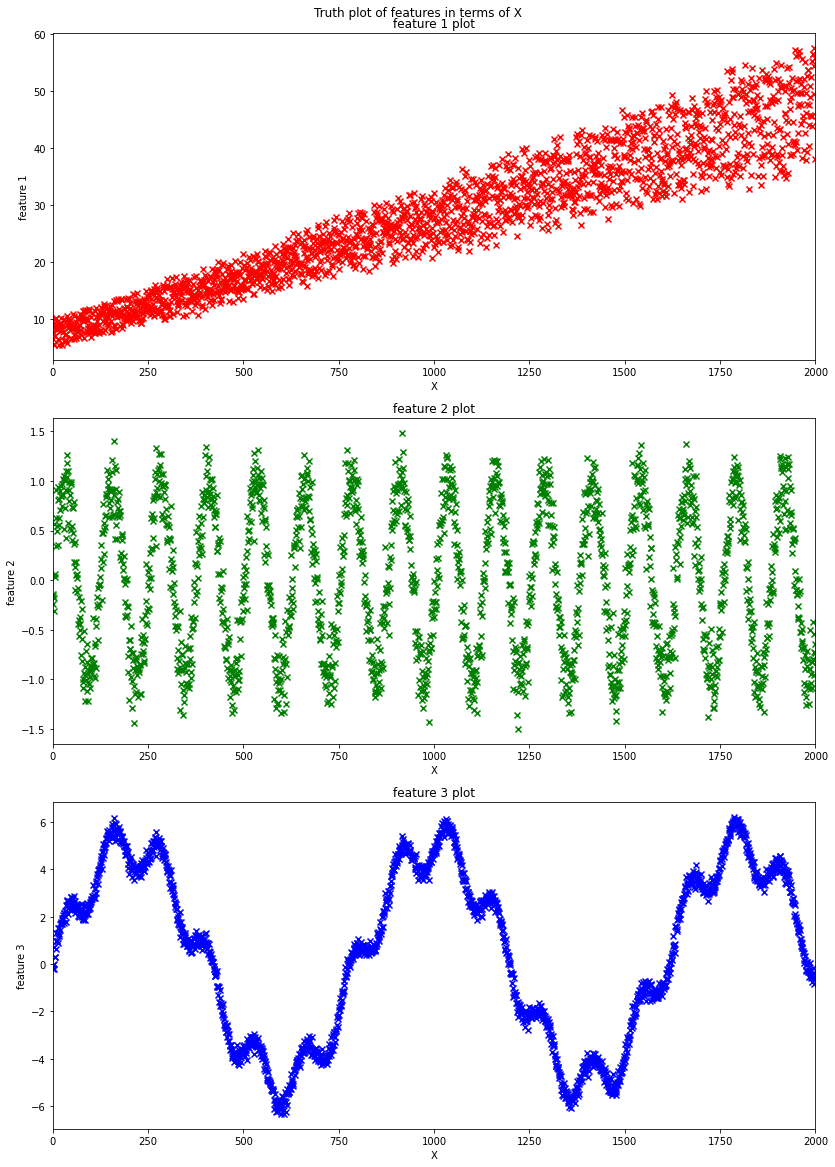

In [17]:
fig, axs = plt.subplots(3)
fig.set_size_inches(h=16.5, w=11.7)
plt.subplots_adjust(hspace=0.3)

fig.suptitle('Truth plot of features in terms of X')

axs[0].set_title("feature 1 plot")
axs[0].set_xlabel("X")
axs[0].set_ylabel("feature 1")
axs[0].set_xlim(0, new_truth[0].size)
axs[0].scatter(new_truth[0], new_truth['feature1'], c='red', marker='x')


axs[1].set_title("feature 2 plot")
axs[1].set_xlabel("X")
axs[1].set_ylabel("feature 2")
axs[1].set_xlim(0, new_truth[0].size)
axs[1].scatter(new_truth[0], new_truth['feature2'],c='green',marker='x')


axs[2].set_title("feature 3 plot")
axs[2].set_xlabel("X")
axs[2].set_ylabel("feature 3")
axs[2].set_xlim(0, new_truth[0].size)
axs[2].scatter(new_truth[0], new_truth['feature3'],c='blue',marker='x')


fig.tight_layout()
plt.show()


#### Data XY-plots

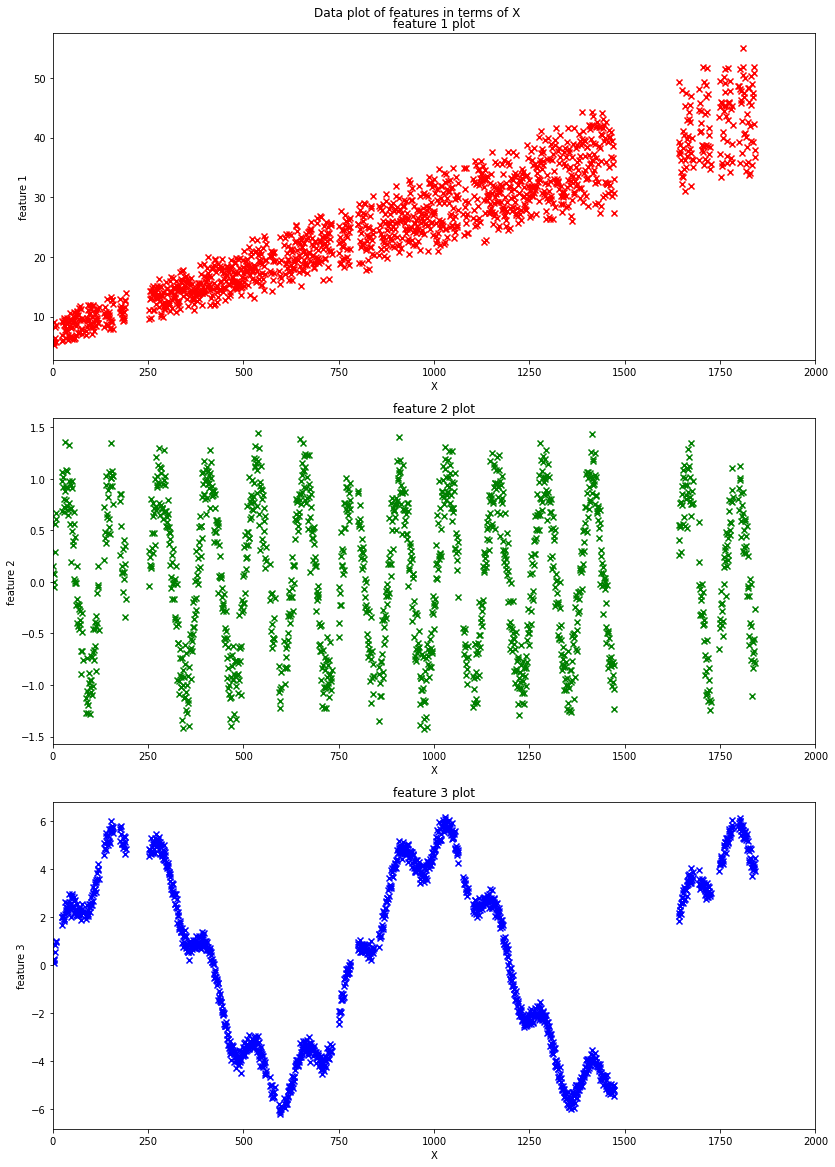

In [18]:
fig, axs = plt.subplots(3)
fig.set_size_inches(h=16.5, w=11.7)
plt.subplots_adjust(hspace=0.3)

fig.suptitle('Data plot of features in terms of X')

axs[0].set_title("feature 1 plot")
axs[0].set_xlabel("X")
axs[0].set_ylabel("feature 1")
axs[0].set_xlim(0, new_data[0].size)
axs[0].scatter(new_data[0], new_data['1'],c='red',marker='x')


axs[1].set_title("feature 2 plot")
axs[1].set_xlabel("X")
axs[1].set_ylabel("feature 2")
axs[1].set_xlim(0, new_data[0].size)
axs[1].scatter(new_data[0], new_data['2'],c='green',marker='x')


axs[2].set_title("feature 3 plot")
axs[2].set_xlabel("X")
axs[2].set_ylabel("feature 3")
axs[2].set_xlim(0, new_data[0].size)
axs[2].scatter(new_data[0], new_data['3'],c='blue',marker='x')

fig.tight_layout()
plt.show()

### Extracting training and test data

#### Training Data

In [19]:
# Extracting training data for feature
f1_data = new_data[new_data['1'].notna()]
display(f1_data)
x1_train, y1_train = f1_data[0], f1_data['1']

# Extracting training data for feature 2
f2_data = new_data[new_data['2'].notna()]
display(f2_data)
x2_train, y2_train = f2_data[0], f2_data['2']

# Extracting training data for feature 3
f3_data = new_data[new_data['3'].notna()]
display(f3_data)
x3_train, y3_train = f3_data[0], f3_data['3']


,1,2,3,0
0,25.618887,-0.932839,3.900162,967
1,28.559832,-1.171867,0.223089,836
2,31.390287,0.826090,2.069539,1168
3,14.205741,-0.921493,1.207404,344
4,25.047604,0.294643,4.731710,939
...,...,...,...,...
1992,38.251575,-0.821563,-5.328839,1343
1993,30.342754,-0.738181,4.187366,978
1994,31.730069,-1.184285,-2.579240,1236
1995,20.383428,1.447426,-2.971402,538


,1,2,3,0
0,25.618887,-0.932839,3.900162,967
1,28.559832,-1.171867,0.223089,836
2,31.390287,0.826090,2.069539,1168
3,14.205741,-0.921493,1.207404,344
4,25.047604,0.294643,4.731710,939
...,...,...,...,...
1992,38.251575,-0.821563,-5.328839,1343
1993,30.342754,-0.738181,4.187366,978
1994,31.730069,-1.184285,-2.579240,1236
1995,20.383428,1.447426,-2.971402,538


,1,2,3,0
0,25.618887,-0.932839,3.900162,967
1,28.559832,-1.171867,0.223089,836
2,31.390287,0.826090,2.069539,1168
3,14.205741,-0.921493,1.207404,344
4,25.047604,0.294643,4.731710,939
...,...,...,...,...
1992,38.251575,-0.821563,-5.328839,1343
1993,30.342754,-0.738181,4.187366,978
1994,31.730069,-1.184285,-2.579240,1236
1995,20.383428,1.447426,-2.971402,538


#### Test data

In [20]:
x1_test=new_data[0][new_data['1'].isna()].sort_values()
x2_test=new_data[0][new_data['2'].isna()].sort_values()
x3_test=new_data[0][new_data['3'].isna()].sort_values()
display(x1_test,x2_test,x3_test)


1999       0
390       10
1732      11
122       12
1867      13
        ... 
1805    1995
1290    1996
1117    1997
592     1998
267     1999
Name: 0, Length: 583, dtype: int32

1999       0
390       10
1732      11
122       12
1867      13
        ... 
1805    1995
1290    1996
1117    1997
592     1998
267     1999
Name: 0, Length: 583, dtype: int32

1999       0
390       10
1732      11
122       12
1867      13
        ... 
1805    1995
1290    1996
1117    1997
592     1998
267     1999
Name: 0, Length: 583, dtype: int32

## Using different regression models with different degrees from interval [1,10] to predict the  missing values and fill the gaps

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [22]:
degrees = list(range(1, 11))
imputed_data = {}
log(degrees)


def fill_missing_data(df, xlabel, missing_x, ylabel, missing_y):
    # Create a new dataframe
    newdf = df.copy()
    # Assigning values
    for x, y in zip(missing_x, missing_y):
        newdf[ylabel][newdf[xlabel] == x]=y
    return newdf


def predict_by_polynomial_regressor(x_train, y_train, x_test, deg):
    # Creating and fitting the model to the training set
    polynomial_features = PolynomialFeatures(degree=deg)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(np.expand_dims(x_train.values, axis=1), y_train)
    # predicting the test values
    y_pred = pipeline.predict(np.expand_dims(x_test.values, axis=1))

    return y_pred

# filling the imputed data frame dictionary
for degree in degrees:
    # initiallizing the imputed data frame in corresponding degree key in dictionary
    imputed_data[degree] = new_data

    # predicting and filling the feature 1 in dataframe
    y1_pred = predict_by_polynomial_regressor(
        x1_train, y1_train, x1_test, degree)
    imputed_data[degree] = fill_missing_data(df=imputed_data[degree], xlabel=0, missing_x=x1_test,
                                             ylabel='1', missing_y=y1_pred)

    # predicting and filling the feature 2 in dataframe
    y2_pred = predict_by_polynomial_regressor(
        x2_train, y2_train, x2_test, degree)
    imputed_data[degree] = fill_missing_data(df=imputed_data[degree], xlabel=0, missing_x=x2_test,
                                             ylabel='2', missing_y=y2_pred)

    # predicting and filling the feature 3 in dataframe
    y3_pred = predict_by_polynomial_regressor(
        x3_train, y3_train, x3_test, degree)
    imputed_data[degree] = fill_missing_data(df=imputed_data[degree], xlabel=0, missing_x=x3_test,
                                             ylabel='3', missing_y=y3_pred)




>> LOG:	 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Ploting predicted dataframes

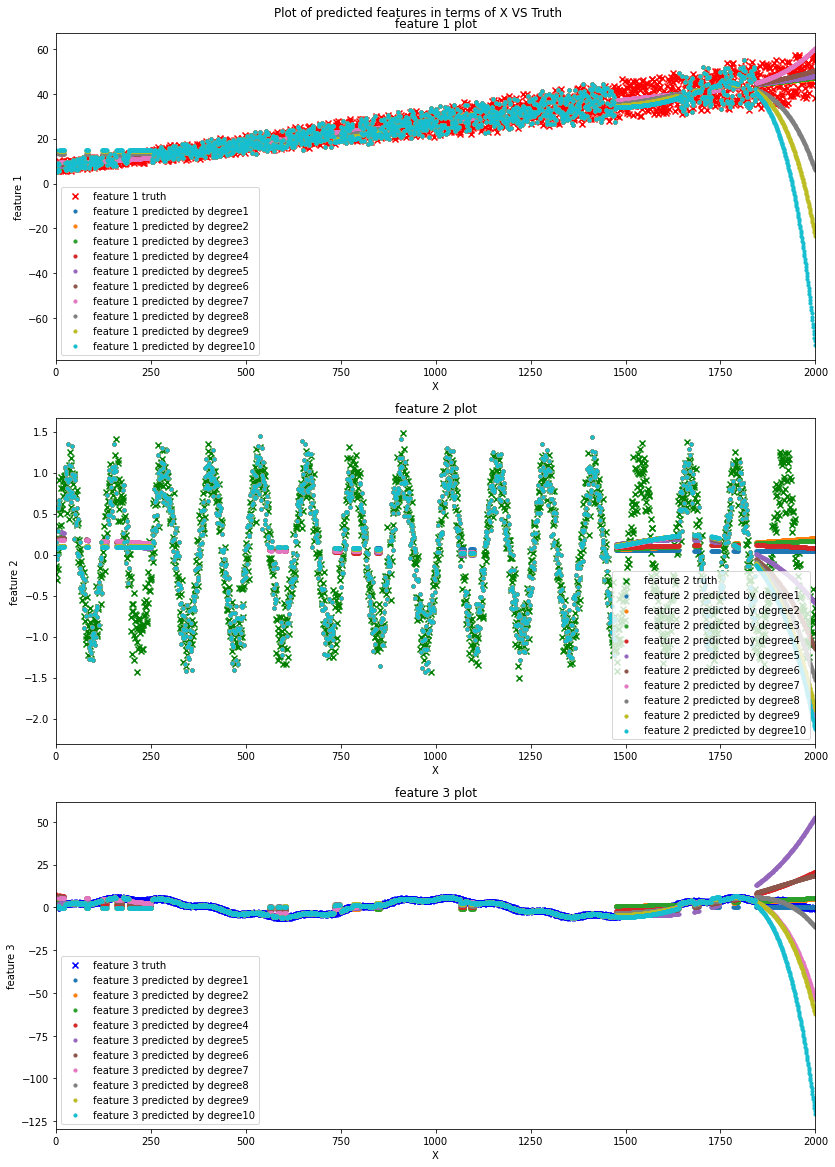

In [23]:
fig, axs = plt.subplots(3)
fig.set_size_inches(h=16.5, w=11.7)
plt.subplots_adjust(hspace=0.3)

fig.suptitle('Plot of predicted features in terms of X VS Truth')

axs[0].set_title("feature 1 plot")
axs[0].set_xlabel("X")
axs[0].set_ylabel("feature 1")
axs[0].set_xlim(0, new_truth[0].size)
axs[0].scatter(new_truth[0], new_truth['feature1'], c='red', marker='x',label='feature 1 truth')


axs[1].set_title("feature 2 plot")
axs[1].set_xlabel("X")
axs[1].set_ylabel("feature 2")
axs[1].set_xlim(0, new_truth[0].size)
axs[1].scatter(new_truth[0], new_truth['feature2'],c='green',marker='x',label='feature 2 truth')


axs[2].set_title("feature 3 plot")
axs[2].set_xlabel("X")
axs[2].set_ylabel("feature 3")
axs[2].set_xlim(0, new_truth[0].size)
axs[2].scatter(new_truth[0], new_truth['feature3'],c='blue',marker='x',label='feature 3 truth')

for degree in degrees:
    axs[0].scatter(imputed_data[degree][0],imputed_data[degree]['1'],s=10,label='feature 1 predicted by degree{}'.format(degree))
    axs[1].scatter(imputed_data[degree][0],imputed_data[degree]['2'],s=10,label='feature 2 predicted by degree{}'.format(degree))
    axs[2].scatter(imputed_data[degree][0],imputed_data[degree]['3'],s=10,label='feature 3 predicted by degree{}'.format(degree))

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
plt.show()

## Ploting change of MSE for each degree for all features

### Retriving MSE

In [24]:
from sklearn import metrics
mean_squared_errors = {}
'''
mean_squared_errors = {
    <key feature 1>:
        {
            < key=degree 1 >  : <value=MSE>,
            < key=degree 2 >  : <value=MSE>,
            < key=degree 3 >  : <value=MSE>,
            ...
        },
    <key feature 2>:
        {
            < key=degree 1 >  : <value=MSE>,
            < key=degree 2 >  : <value=MSE>,
            < key=degree 3 >  : <value=MSE>,
            ...
        },
    <key feature 3>:
        {
            < key=degree 1 >  : <value=MSE>,
            < key=degree 2 >  : <value=MSE>,
            < key=degree 3 >  : <value=MSE>,
            ...
        }
}
'''
features = ['1','2','3']
# Reteriving MSE
for feature in features:
    mean_squared_errors[feature]={}
    y_true = new_truth.sort_values(by=[0],ignore_index=True)['feature'+feature]
    for degree in degrees:
        y_pred = imputed_data[degree].sort_values(by=[0],ignore_index=True)[feature]
        mean_squared_errors[feature][degree] = metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)
display(mean_squared_errors)


{'1': {1: 20.712091245288605,
  2: 20.76025342607154,
  3: 20.738356570052137,
  4: 20.708324530940814,
  5: 20.704300827052357,
  6: 20.739277206272245,
  7: 23.06879168059321,
  8: 55.36320925380004,
  9: 111.83714669292097,
  10: 260.4951618688391},
 '2': {1: 0.24078134531856696,
  2: 0.24739189119858468,
  3: 0.24614057899417763,
  4: 0.24450038486162515,
  5: 0.24134337834678624,
  6: 0.25590446783792653,
  7: 0.2991789704566498,
  8: 0.2708498484966309,
  9: 0.2894225843497836,
  10: 0.3041029123508279},
 '3': {1: 3.144387628036082,
  2: 2.5464015592598312,
  3: 2.6831051883639385,
  4: 13.635614627650485,
  5: 74.83268539874204,
  6: 12.603829075236114,
  7: 47.367789972561866,
  8: 3.4301092030569773,
  9: 63.3440231417508,
  10: 233.8419860600819}}

### ploting MSE

>> LOG:	 ['Degree1', 'Degree2', 'Degree3', 'Degree4', 'Degree5', 'Degree6', 'Degree7', 'Degree8', 'Degree9', 'Degree10'] ['Feature1', 'Feature2', 'Feature3'] [[2.07120912e+01 2.07602534e+01 2.07383566e+01 2.07083245e+01
  2.07043008e+01 2.07392772e+01 2.30687917e+01 5.53632093e+01
  1.11837147e+02 2.60495162e+02]
 [2.40781345e-01 2.47391891e-01 2.46140579e-01 2.44500385e-01
  2.41343378e-01 2.55904468e-01 2.99178970e-01 2.70849848e-01
  2.89422584e-01 3.04102912e-01]
 [3.14438763e+00 2.54640156e+00 2.68310519e+00 1.36356146e+01
  7.48326854e+01 1.26038291e+01 4.73677900e+01 3.43010920e+00
  6.33440231e+01 2.33841986e+02]]


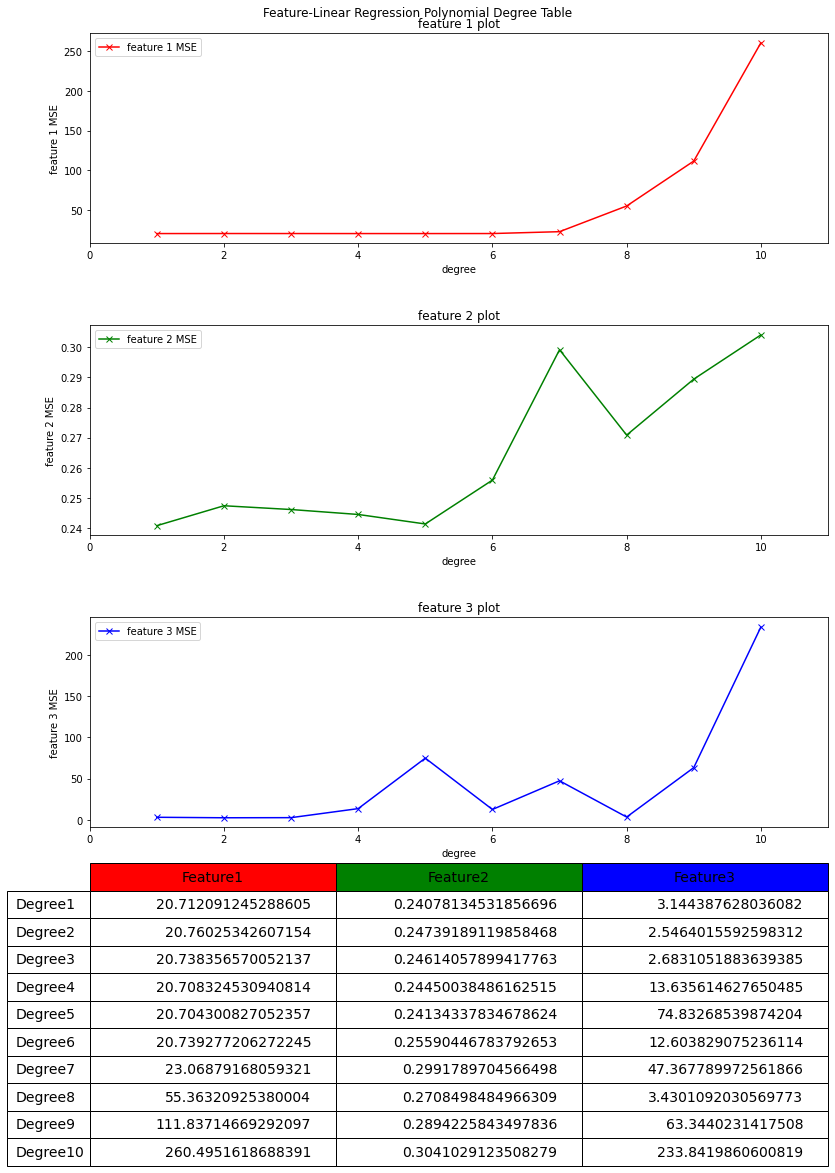

In [25]:
fig, axs = plt.subplots(4)
fig.set_size_inches(h=16.5, w=11.7)
plt.subplots_adjust(hspace=0.3)

fig.suptitle('Feature-Linear Regression Polynomial Degree Table')

axs[0].set_title("feature 1 plot")
axs[0].set_xlabel("degree")
axs[0].set_ylabel("feature 1 MSE")
axs[0].set_xlim(0, len(degrees)+1)
axs[0].plot(degrees, list(mean_squared_errors[features[0]].values()),
            c='red', marker='x', label='feature 1 MSE')


axs[1].set_title("feature 2 plot")
axs[1].set_xlabel("degree")
axs[1].set_ylabel("feature 2 MSE")
axs[1].set_xlim(0, len(degrees)+1)
axs[1].plot(degrees, list(mean_squared_errors[features[1]].values()),
            c='green', marker='x', label='feature 2 MSE')


axs[2].set_title("feature 3 plot")
axs[2].set_xlabel("degree")
axs[2].set_ylabel("feature 3 MSE")
axs[2].set_xlim(0, len(degrees)+1)
axs[2].plot(degrees,list(mean_squared_errors[features[2]].values()),
            c='blue', marker='x', label='feature 3 MSE')


axs[0].legend()
axs[1].legend()
axs[2].legend()


cell_text = []

rows = ['Degree'+str(degree) for degree in degrees]

columns = []

for feature in features:
    cell_text.append(list(mean_squared_errors[feature].values()))
    columns += ['Feature'+feature]

cell_text = np.array(cell_text)

colors = ['red', 'green', 'blue']
log(rows, columns, cell_text)
axs[3].patch.set_visible(False)
axs[3].axis('off')
axs[3].axis('tight')
tb = axs[3].table(cellText=cell_text.T,

                  rowLabels=rows,
                  colColours=colors,
                  colLabels=columns,
                  loc='center')
tb.set_fontsize(14)
tb.set_label('Feature-Linear Regression Polynomial Degree Table')
tb.scale(1, 2)
fig.tight_layout()
plt.show()


## Report best regression degree for each feature

In [26]:
# Obtaining list of MSE
feature_1_mses = np.array(list(
    mean_squared_errors[features[0]].values()
))
feature_2_mses = np.array(list(
    mean_squared_errors[features[1]].values()
))
feature_3_mses = np.array(list(
    mean_squared_errors[features[2]].values()
))
log('F1-MSE list =',feature_1_mses)
log('F2-MSE list =',feature_2_mses)
log('F3-MSE list =',feature_3_mses)
# Corresponding the optimised degree to the corresponding index of minimum MSE
optimised_degree_feature1 = degrees[
    np.argmin(feature_1_mses)]
optimised_degree_feature2 = degrees[
    np.argmin(feature_2_mses)]
optimised_degree_feature3 = degrees[
    np.argmin(feature_3_mses)]
# Printing the results
print("Optimized degree of polynomial regression for feature one is {0}  which MSE is: {1}".format(
        optimised_degree_feature1,
        mean_squared_errors[features[0]][optimised_degree_feature1]))
display("Optimized degree of polynomial regression for feature two is {0}  which MSE is: {1}".format(
        optimised_degree_feature2,
        mean_squared_errors[features[1]][optimised_degree_feature2]))
display("Optimized degree of polynomial regression for feature three is {0}  which MSE is: {1}".format(
        optimised_degree_feature3,
        mean_squared_errors[features[2]][optimised_degree_feature3]))



>> LOG:	 F1-MSE list = [ 20.71209125  20.76025343  20.73835657  20.70832453  20.70430083
  20.73927721  23.06879168  55.36320925 111.83714669 260.49516187]
>> LOG:	 F2-MSE list = [0.24078135 0.24739189 0.24614058 0.24450038 0.24134338 0.25590447
 0.29917897 0.27084985 0.28942258 0.30410291]
>> LOG:	 F3-MSE list = [  3.14438763   2.54640156   2.68310519  13.63561463  74.8326854
  12.60382908  47.36778997   3.4301092   63.34402314 233.84198606]
Optimized degree of polynomial regression for feature one is 5  which MSE is: 20.704300827052357


'Optimized degree of polynomial regression for feature two is 1  which MSE is: 0.24078134531856696'

'Optimized degree of polynomial regression for feature three is 2  which MSE is: 2.5464015592598312'

# Task 2

## Preprocess and visualization of the dataset

### Importing data

In [27]:
# importing data frames
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.mode.chained_assignment = None
bank_data = pd.read_csv('./GermanData.csv')


#### Checking few rows, description  and the data types

In [28]:
display(bank_data.head)
display(bank_data.describe())
types = bank_data.dtypes
display("Number categorical features in Truth:", sum(types=='object'))
display(types)

<bound method NDFrame.head of      A11   6  A34  A43  1169  A65  A75  4  A93  A101  ...  A121  67  A143  \
0    A12  48  A32  A43  5951  A61  A73  2  A92  A101  ...  A121  22  A143   
1    A14  12  A34  A46  2096  A61  A74  2  A93  A101  ...  A121  49  A143   
2    A11  42  A32  A42  7882  A61  A74  2  A93  A103  ...  A122  45  A143   
3    A11  24  A33  A40  4870  A61  A73  3  A93  A101  ...  A124  53  A143   
4    A14  36  A32  A46  9055  A65  A73  2  A93  A101  ...  A124  35  A143   
..   ...  ..  ...  ...   ...  ...  ... ..  ...   ...  ...   ...  ..   ...   
994  A14  12  A32  A42  1736  A61  A74  3  A92  A101  ...  A121  31  A143   
995  A11  30  A32  A41  3857  A61  A73  4  A91  A101  ...  A122  40  A143   
996  A14  12  A32  A43   804  A61  A75  4  A93  A101  ...  A123  38  A143   
997  A11  45  A32  A43  1845  A61  A73  4  A93  A101  ...  A124  23  A143   
998  A12  45  A34  A41  4576  A62  A71  3  A93  A101  ...  A123  27  A143   

     A152  2  A173  1  A192  A201 1.1  
0    

,6,1169,4,4.1,67,2,1,1.1
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


'Number categorical features in Truth:'

13

A11     object
6        int64
A34     object
A43     object
1169     int64
A65     object
A75     object
4        int64
A93     object
A101    object
4.1      int64
A121    object
67       int64
A143    object
A152    object
2        int64
A173    object
1        int64
A192    object
A201    object
1.1      int64
dtype: object

### Handling Missing/ N.A values
> since we ain't got no missing or np.NaN values, we don't need to worry about it!

In [29]:
def count_nans(df):

    return pd.isna(df).sum().sum()

log("#Empty cells in bank_data=", count_nans(bank_data))
log("bank_data Columns=",bank_data.columns)


>> LOG:	 #Empty cells in bank_data= 0
>> LOG:	 bank_data Columns= Index(['A11', '6', 'A34', 'A43', '1169', 'A65', 'A75', '4', 'A93', 'A101',
       '4.1', 'A121', '67', 'A143', 'A152', '2', 'A173', '1', 'A192', 'A201',
       '1.1'],
      dtype='object')


### Changing the column labels

In [30]:
labels = ['Checking account status', 'Duration in month', 'Credit history', 'Purpose',
               'Credit amount', 'Savings', 'Employment since', 'Installment rate',
                'Sex/status', 'Other debtors / guarantors', 'Resident since', 
               'Property', 'Age', 'Other installment plans', 'Housing', 'Existing credits',
                'Job', 'Maintenance', 'Telephone', 'Foreign worker', 
               'y']
new_column_labels = {y: labels[x] for x, y in enumerate(bank_data.columns)}
log(new_column_labels)
bank_data.rename(axis=1, mapper=new_column_labels, inplace=True)
y = bank_data['y']

bank_data = bank_data[bank_data.columns[:-1]]
display(bank_data.head())
display(y.head())

>> LOG:	 {'A11': 'Checking account status', '6': 'Duration in month', 'A34': 'Credit history', 'A43': 'Purpose', '1169': 'Credit amount', 'A65': 'Savings', 'A75': 'Employment since', '4': 'Installment rate', 'A93': 'Sex/status', 'A101': 'Other debtors / guarantors', '4.1': 'Resident since', 'A121': 'Property', '67': 'Age', 'A143': 'Other installment plans', 'A152': 'Housing', '2': 'Existing credits', 'A173': 'Job', '1': 'Maintenance', 'A192': 'Telephone', 'A201': 'Foreign worker', '1.1': 'y'}


,Checking account status,Duration in month,Credit history,Purpose,Credit amount,Savings,Employment since,Installment rate,Sex/status,Other debtors / guarantors,Resident since,Property,Age,Other installment plans,Housing,Existing credits,Job,Maintenance,Telephone,Foreign worker
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201


0    2
1    1
2    1
3    2
4    1
Name: y, dtype: int64

### Preparing Encoders and labels

In [31]:
# Makeing feature names and categories
ordinal_encoder_fn = ['Checking account status', 'Credit history', 'Savings',
                      'Employment since', 'Other debtors / guarantors', 'Telephone', 'Foreign worker']
one_hot_encoder_fn = ['Purpose', 'Sex/status',
                      'Property', 'Other installment plans', 'Housing', 'Job']
numerical_fn = ['Duration in month', 'Credit amount', 'Resident since',
                'Age', 'Existing credits', 'Maintenance']

# Ordinal Encoded Features
checking_account_status = [  # Status of existing checking account - order for OE
    'A11',
    'A12',
    'A13',
    'A14'
]
credit_history = [  # Credit history - order for OE
    'A34',
    'A33',
    'A32',
    'A31',
    'A30'
]
savings = [  # Savings account/bonds - order for OE
    'A61',
    'A62',
    'A63',
    'A64',
    'A65'
]
employment_since = [  # Present employment since - order for OE
    'A71',
    'A72',
    'A73',
    'A74',
    'A75'
]
other_debtors_guarantors = [  # Other debtors / guarantors - order for OE
    'A101',
    'A102',
    'A103'
]
telephone = [  # Telephone - order for OE
    'A191',
    'A192'
]
foreign_worker = [  # Foreign worker - order for OE
    'A201',
    'A202'
]
ordinal_encoder_cats = [checking_account_status, credit_history, savings,
                        employment_since, other_debtors_guarantors, telephone,
                        foreign_worker]


In [32]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


def oe_new_features(df, cat, features_name):
    encoder = OrdinalEncoder()
    encoder.categories_ = cat
    encoder.fit(df[features_name])
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats,dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    label = {x: y for x, y in zip(new_cols.columns, features_name)}
    new_df.rename(mapper=label, axis=1, inplace=True)

    return new_df


def ohe_new_features(df, features_name):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit(df[features_name])
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int,columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


In [33]:
# Checking the ordinal encoded columns
bank_df=oe_new_features(bank_data,ordinal_encoder_cats,ordinal_encoder_fn)
bank_df=ohe_new_features(bank_df,one_hot_encoder_fn)
display(bank_df)
log("Your encoded dataframe dimention is: ",bank_df.shape)



,Duration in month,Credit amount,Installment rate,Resident since,Age,Existing credits,Maintenance,Checking account status,Credit history,Savings,...,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,48,5951,2,2,22,1,1,1,2,0,...,0,0,1,0,1,0,0,0,1,0
1,12,2096,2,3,49,1,2,3,4,0,...,0,0,1,0,1,0,0,1,0,0
2,42,7882,2,4,45,1,2,0,2,0,...,0,0,1,0,0,1,0,0,1,0
3,24,4870,3,4,53,2,2,0,3,0,...,0,0,1,0,0,1,0,0,1,0
4,36,9055,2,4,35,1,2,3,2,4,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,12,1736,3,4,31,1,1,3,2,0,...,0,0,1,0,1,0,0,1,0,0
995,30,3857,4,4,40,1,1,0,2,0,...,0,0,1,0,1,0,0,0,0,1
996,12,804,4,4,38,1,1,3,2,0,...,0,0,1,0,1,0,0,0,1,0
997,45,1845,4,4,23,1,1,0,2,0,...,0,0,1,0,0,1,0,0,1,0


>> LOG:	 Your encoded dataframe dimention is:  (999, 42)


In [34]:
log(bank_df.columns)


>> LOG:	 Index(['Duration in month', 'Credit amount', 'Installment rate',
       'Resident since', 'Age', 'Existing credits', 'Maintenance',
       'Checking account status', 'Credit history', 'Savings',
       'Employment since', 'Other debtors / guarantors', 'Telephone',
       'Foreign worker', 'Purpose_A40', 'Purpose_A41', 'Purpose_A410',
       'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45',
       'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Sex/status_A91',
       'Sex/status_A92', 'Sex/status_A93', 'Sex/status_A94', 'Property_A121',
       'Property_A122', 'Property_A123', 'Property_A124',
       'Other installment plans_A141', 'Other installment plans_A142',
       'Other installment plans_A143', 'Housing_A151', 'Housing_A152',
       'Housing_A153', 'Job_A171', 'Job_A172', 'Job_A173', 'Job_A174'],
      dtype='object')


### Feature scaling

#### Choosing scaling feature names
* ```Feature<5>``` aka "Credit Amount" is chosen to undergo the robust scaling since it can have outer layer data.
* Rest of numerical features have been chosen to undergo the standard scaling
* One Hot Encoded Features have not been scaled since the values are basically zeros and ones, besides we may need to reverse transform some of the OHEed columns.

In [35]:
robust_scale_fn= ['Credit amount']
std_scale_fn= numerical_fn + ordinal_encoder_fn

std_scale_fn.remove('Credit amount')

print(robust_scale_fn,std_scale_fn)

['Credit amount'] ['Duration in month', 'Resident since', 'Age', 'Existing credits', 'Maintenance', 'Checking account status', 'Credit history', 'Savings', 'Employment since', 'Other debtors / guarantors', 'Telephone', 'Foreign worker']


#### Using ```sklearn``` scalers to scale the desisered features  

In [36]:
def scale_features(df, feature_names, scaler):
    for fn in feature_names:
        df[fn] = scaler.fit_transform(np.array(df[fn]).reshape(-1, 1))



In [37]:
from sklearn.preprocessing import RobustScaler,StandardScaler
robust_scaler = RobustScaler()
std_scaler = StandardScaler()
scale_features(bank_df,robust_scale_fn,robust_scaler)
scale_features(bank_df,std_scale_fn,std_scaler)

In [38]:
display(bank_df)   # Preprocessed data
display(bank_data) # Raw data

,Duration in month,Credit amount,Installment rate,Resident since,Age,Existing credits,Maintenance,Checking account status,Credit history,Savings,...,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,2.247553,1.394393,2,-0.764966,-1.192617,-0.703918,-0.428543,-0.460415,-0.502286,-0.698699,...,0,0,1,0,1,0,0,0,1,0
1,-0.740102,-0.086022,2,0.141560,1.190056,-0.703918,2.333487,1.131123,1.345904,-0.698699,...,0,0,1,0,1,0,0,1,0,0
2,1.749611,2.135945,2,1.048086,0.837067,-0.703918,2.333487,-1.256183,-0.502286,-0.698699,...,0,0,1,0,0,1,0,0,1,0
3,0.255783,0.979263,3,1.048086,1.543044,1.028136,2.333487,-1.256183,0.421809,-0.698699,...,0,0,1,0,0,1,0,0,1,0
4,1.251668,2.586406,2,1.048086,-0.045404,-0.703918,2.333487,1.131123,-0.502286,1.837179,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.740102,-0.224270,3,1.048086,-0.398393,-0.703918,-0.428543,1.131123,-0.502286,-0.698699,...,0,0,1,0,1,0,0,1,0,0
995,0.753726,0.590246,4,1.048086,0.395831,-0.703918,-0.428543,-1.256183,-0.502286,-0.698699,...,0,0,1,0,1,0,0,0,0,1
996,-0.740102,-0.582181,4,1.048086,0.219337,-0.703918,-0.428543,1.131123,-0.502286,-0.698699,...,0,0,1,0,1,0,0,0,1,0
997,1.998582,-0.182412,4,1.048086,-1.104370,-0.703918,-0.428543,-1.256183,-0.502286,-0.698699,...,0,0,1,0,0,1,0,0,1,0


,Checking account status,Duration in month,Credit history,Purpose,Credit amount,Savings,Employment since,Installment rate,Sex/status,Other debtors / guarantors,Resident since,Property,Age,Other installment plans,Housing,Existing credits,Job,Maintenance,Telephone,Foreign worker
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


### Visualize the dataset in two dimensions 

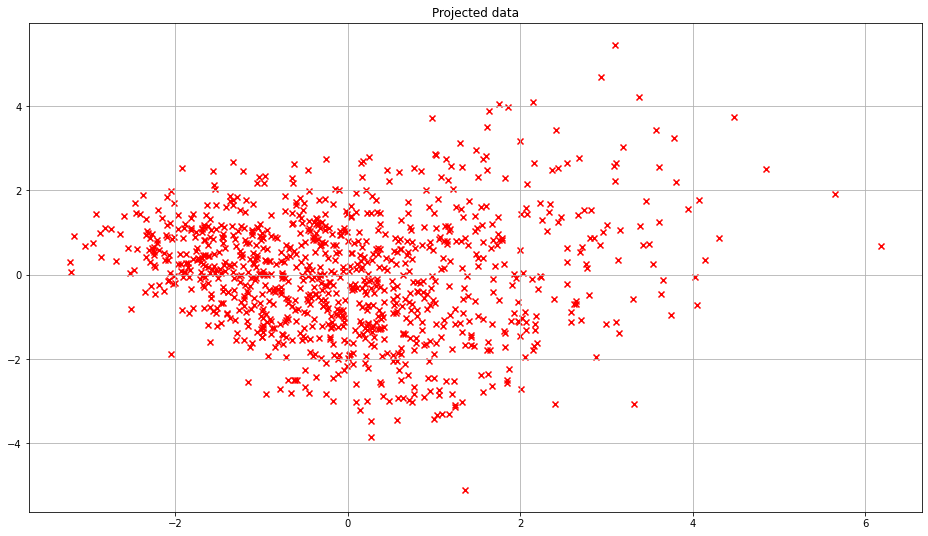

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(bank_df)
plt.figure(figsize=(16,9))
plt.title("Projected data")
plt.scatter(pca_df[:, 0],pca_df[:, 1],marker='x',c='red')
plt.grid('True')


### Visualize the dataset corelation matrix

,Duration in month,Credit amount,Installment rate,Resident since,Age,Existing credits,Maintenance,Checking account status,Credit history,Savings,Employment since,Other debtors / guarantors,Telephone,Foreign worker,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Sex/status_A91,Sex/status_A92,Sex/status_A93,Sex/status_A94,Property_A121,Property_A122,Property_A123,Property_A124,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
Duration in month,1.000000,0.624714,0.075976,0.035410,-0.032863,-0.010025,-0.024385,-0.073680,-0.075649,0.050052,0.059135,-0.024886,0.166472,-0.138548,-0.110784,0.144639,0.104460,-0.063441,-0.042421,-0.037377,-0.022753,0.003469,-0.072324,0.163841,0.006135,-0.082343,0.123158,-0.084881,-0.241102,-0.057439,0.118733,0.212492,0.035383,0.065465,-0.067070,-0.065052,-0.074456,0.188842,-0.044263,-0.181984,0.056018,0.147125
Credit amount,0.624714,1.000000,-0.270820,0.029732,0.034924,0.021578,0.016829,-0.043687,-0.058973,0.066127,-0.007377,-0.028068,0.278184,-0.050211,-0.041223,0.251933,0.192866,-0.034401,-0.172277,-0.069370,-0.028995,-0.007562,-0.069854,0.102806,0.033458,-0.094030,0.153241,-0.138572,-0.247532,-0.032980,0.075192,0.248695,0.039189,0.024104,-0.047954,-0.024969,-0.117080,0.201451,-0.028089,-0.162195,-0.092118,0.319520
Installment rate,0.075976,-0.270820,1.000000,0.048387,0.055961,0.020744,-0.070850,-0.004131,0.043196,0.020350,0.125096,-0.011124,0.013312,-0.089884,-0.045319,-0.094531,-0.030104,-0.062580,0.137312,0.019198,0.040359,0.042701,0.040285,-0.025036,-0.096880,-0.085741,0.117496,0.007983,-0.036083,-0.020134,0.017683,0.045406,-0.015788,0.056301,-0.016588,-0.090993,0.049369,0.040437,-0.087734,-0.056809,0.041948,0.043210
Resident since,0.035410,0.029732,0.048387,1.000000,0.264680,0.088644,0.043120,-0.040974,0.061879,0.089703,0.244031,-0.025374,0.094208,-0.053923,0.020442,0.107677,0.040598,-0.006445,-0.091892,-0.017710,0.027426,0.040816,0.013497,-0.048585,-0.038254,0.014532,0.062747,-0.102411,-0.087025,-0.023149,-0.040755,0.188595,0.014960,-0.054259,0.016213,0.167885,-0.298436,0.227547,-0.034407,0.009595,-0.001462,0.005393
Age,-0.032863,0.034924,0.055961,0.264680,1.000000,0.147051,0.119858,0.063519,0.144046,0.079608,0.253722,-0.029145,0.142547,-0.005630,0.076881,0.051999,0.042835,-0.126856,-0.051104,-0.012304,0.040137,0.069386,-0.007134,-0.000868,0.063310,-0.160490,0.205793,-0.145212,0.007156,-0.027273,-0.142113,0.208368,0.047853,-0.010506,-0.036831,-0.212165,0.004815,0.255016,0.060602,0.045276,-0.151029,0.129266
Existing credits,-0.010025,0.021578,0.020744,0.088644,0.147051,1.000000,0.110175,0.077397,0.436309,-0.023581,0.124592,-0.025149,0.064386,-0.009521,0.036438,-0.004902,0.017875,-0.070039,-0.032413,-0.061701,0.071583,-0.010498,-0.012068,0.085366,-0.026401,-0.093641,0.117374,-0.032315,0.006940,-0.009388,0.011311,-0.012419,0.042629,0.023737,-0.050814,-0.057627,0.040763,0.011771,0.059769,-0.009884,-0.002261,-0.010484
Maintenance,-0.024385,0.016829,-0.070850,0.043120,0.119858,0.110175,1.000000,-0.014696,0.012138,0.028350,0.097862,0.020272,-0.014245,0.076995,0.102451,0.054724,0.003506,-0.086734,-0.081890,-0.047253,0.029891,0.041111,0.017662,-0.000467,-0.060327,-0.203783,0.284016,-0.117362,0.020916,-0.006521,-0.073436,0.077379,0.075360,0.009241,-0.072030,-0.063246,-0.027315,0.117916,-0.007789,0.144883,-0.106449,-0.015277
Checking account status,-0.073680,-0.043687,-0.004131,-0.040974,0.063519,0.077397,-0.014696,1.000000,0.194207,0.225727,0.108201,-0.128225,0.067925,-0.027026,-0.070319,0.063932,-0.065391,-0.098695,0.112880,-0.021519,-0.009383,0.007566,0.006684,0.021194,-0.050885,-0.026447,0.053641,-0.011651,0.037947,-0.060801,0.075948,-0.075226,-0.047004,-0.004489,0.044234,-0.092566,0.130360,-0.075641,-0.047378,-0.041238,0.056206,-0.010381
Credit history,-0.075649,-0.058973,0.043196,0.061879,0.144046,0.436309,0.012138,0.1

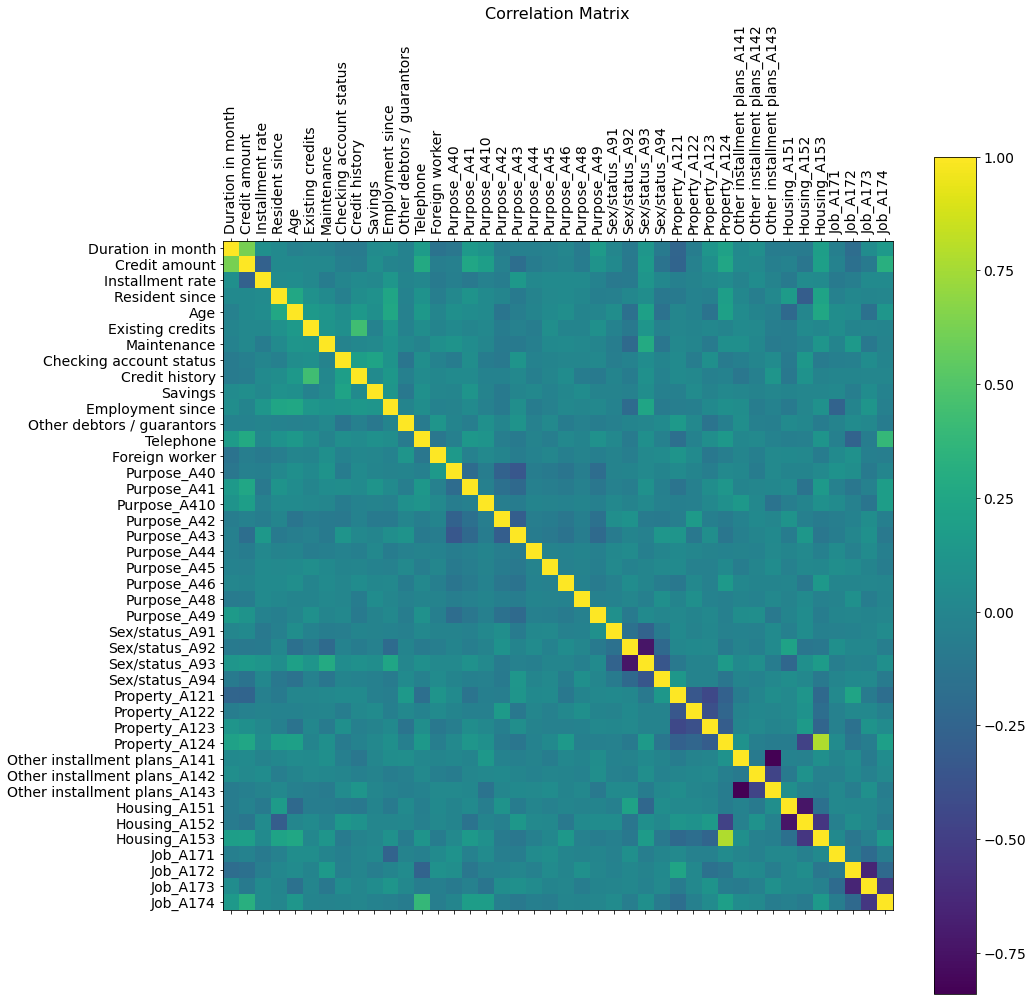

In [40]:
correlation_matrix = bank_df.corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(correlation_matrix,f.number)
plt.xticks(range(bank_df.select_dtypes(['number']).shape[1]), bank_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(bank_df.select_dtypes(['number']).shape[1]), bank_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
display(correlation_matrix.style.background_gradient(cmap='coolwarm'))

#### Are there highly co-related features in the dataset?  Is it a problem for regression task?
> Appearantly, the most correlated features are columns ```Other installments plans_A141``` and ```Other installments plans_A143``` which corresponds to categories of the ```Attribute 14``` in the dataset:
```
Attribute 14: (qualitative) Other installment plans

	      A141 : bank
	      A142 : stores
	      A143 : none
```
besides, ```Housing_A153``` and ```Property_A124``` Property features are also highly corelated, which also makes logical sense regarding these categories. if someones houseing is for free, with correlation of 0.779822 we may imply he ain't got no property. and the rest of list is in the cell below.
> Correlated features in training sets can cause the ```multicollinearity``` issue. In such a senario, the features which are producing the linear model, are not linearly independent, which can cause sigularity in solution of the linear regression.

In [41]:
so = correlation_matrix[
    ((correlation_matrix < - 0.5) | (correlation_matrix > 0.5))
    & (correlation_matrix != 1.00)
].unstack().sort_values(kind="quicksort",ascending = True)
display(so.head(20))


Other installment plans_A141  Other installment plans_A143   -0.840518
Other installment plans_A143  Other installment plans_A141   -0.840518
Sex/status_A92                Sex/status_A93                 -0.737897
Sex/status_A93                Sex/status_A92                 -0.737897
Housing_A151                  Housing_A152                   -0.735900
Housing_A152                  Housing_A151                   -0.735900
Job_A172                      Job_A173                       -0.652328
Job_A173                      Job_A172                       -0.652328
Housing_A152                  Housing_A153                   -0.548368
Housing_A153                  Housing_A152                   -0.548368
Job_A173                      Job_A174                       -0.543739
Job_A174                      Job_A173                       -0.543739
Duration in month             Credit amount                   0.624714
Credit amount                 Duration in month               0.624714
Proper

## Spliting Data

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bank_df,y,test_size=0.3,random_state=0,stratify=y)

## Apply logistic regression using linear and non linear function. Use different polynomial models with different degree (range from 1 to 10) 

### Linear Logistic Regression

In [43]:
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics
models_prediction={}
lo_reg = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = lo_reg.predict(x_test)
print('Linear Logistic Regression Accuracy Score', metrics.accuracy_score(y_test, y_pred))
print('Linear Logistic Regression Recall Score:',metrics.recall_score(y_test,y_pred))
print('Linear Logistic Regression Percision Score', metrics.precision_score(y_test, y_pred))
print('Linear Logistic Regression MSE', metrics.mean_absolute_error(y_test, y_pred))
models_prediction["LinearLR"]=y_pred

Linear Logistic Regression Accuracy Score 0.76
Linear Logistic Regression Recall Score: 0.8952380952380953
Linear Logistic Regression Percision Score 0.7899159663865546
Linear Logistic Regression MSE 0.24


### polinomial logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
degrees = list(range(1, 6))


def predict_by_polynomial_logistic_regressor(x_train, y_train, x_test, deg):
    # Creating and fitting the model to the training set
    # decrementing dimentions such that the amount of variance is retained % 0.99
    pca = PCA(n_components=0.99, svd_solver='full') 
    pca_x = pca.fit_transform(x_train)
    polynomial_features = PolynomialFeatures(
        degree=deg, interaction_only=False, include_bias=False)
    logistic_regression = LogisticRegression(max_iter=10000)
    pipeline = Pipeline([#('pca', pca),
                         ("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])

    pipeline.fit(pca_x, y_train)
    y_pred = pipeline.predict(pca.transform(x_test))
    # print(y_pred)
    return y_pred



models_prediction["PolynomialLR"] = {}

# filling the imputed data frame dictionary
for degree in degrees:
    print(degree)
    models_prediction["PolynomialLR"][degree] = predict_by_polynomial_logistic_regressor(
        x_train, y_train, x_test, degree)



1
2
3
4
5


### Models Bias-Variance comparision

#### Ploting models

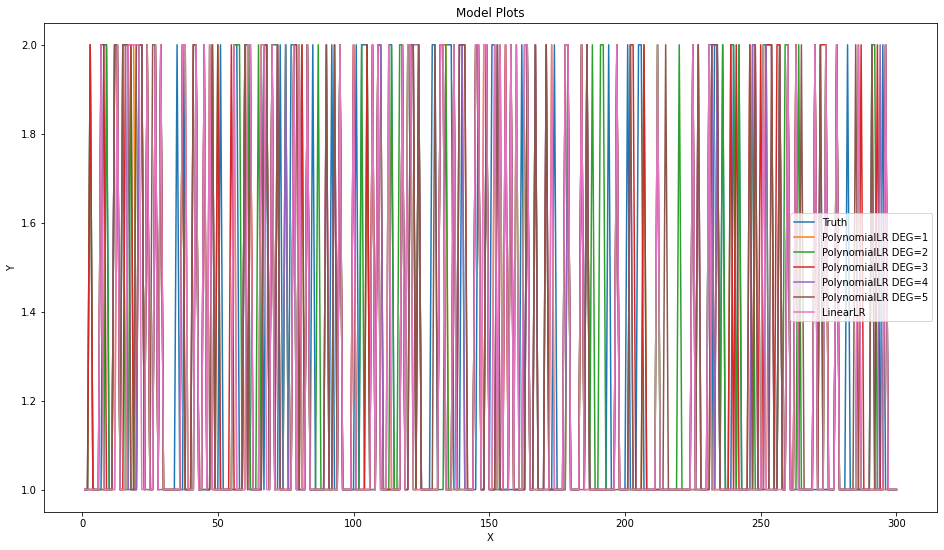

In [45]:
f = plt.figure(figsize=(16, 9))
plt.title("Model Plots")
plt.xlabel("X")
plt.ylabel("Y")
x_axis=np.arange(1,y_test.size+1)
# log(x_axis)

plt.plot(x_axis,y_test,label='Truth')
for degree in degrees:
    plt.plot(x_axis,models_prediction['PolynomialLR'][degree],label='PolynomialLR DEG='+str(degree))

plt.plot(x_axis,models_prediction['LinearLR'],label='LinearLR')


plt.legend()

#### Ploting model scores

>> LOG:	 MAXIMUM RECALL SCORE 0.919047619047619  DEG = 1
>> LOG:	 MAXIMUM RECALL SCORE 0.8041666666666667  DEG = 1
>> LOG:	 MAXIMUM ACCURACY SCORE 0.7866666666666666  DEG = 1
>> LOG:	 MINIMUM MSE SCORE 0.21333333333333335  DEG = 1


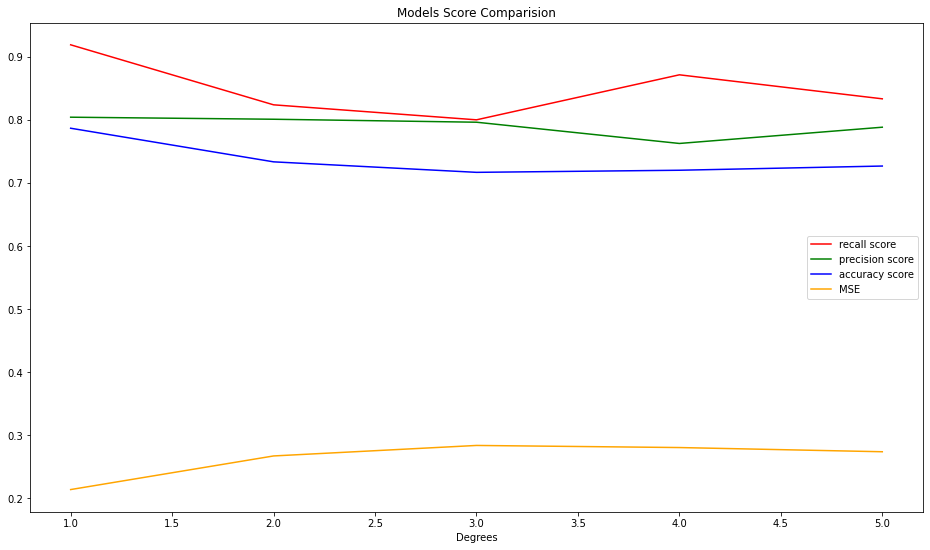

In [46]:
models_recall = []
models_precision = []
models_accuracy = []
models_mse = []
models_var = []


for degree in degrees:
    models_recall.append(metrics.recall_score(
        y_test, models_prediction['PolynomialLR'][degree]))
    models_precision.append(metrics.precision_score(
        y_test, models_prediction['PolynomialLR'][degree]))
    models_accuracy.append(metrics.accuracy_score(
        y_test, models_prediction['PolynomialLR'][degree]))
    models_mse.append(metrics.mean_squared_error(
        y_test, models_prediction['PolynomialLR'][degree]))

f = plt.figure(figsize=(16, 9))
plt.title("Models Score Comparision")
plt.xlabel("Degrees")
plt.plot(degrees, models_recall, color='red', label='recall score')
plt.plot(degrees, models_precision, color='green', label='precision score')
plt.plot(degrees, models_accuracy, color='blue', label='accuracy score')
plt.plot(degrees, models_mse, color='orange', label='MSE')

plt.legend()

log("MAXIMUM RECALL SCORE", max((models_recall)),
    " DEG =", degrees[np.argmax(models_recall)])
log("MAXIMUM RECALL SCORE", max((models_precision)),
    " DEG =", degrees[np.argmax(models_precision)])
log("MAXIMUM ACCURACY SCORE", max((models_accuracy)),
    " DEG =", degrees[np.argmax(models_accuracy)])
log("MINIMUM MSE SCORE", min((models_mse)),
    " DEG =", degrees[np.argmin(models_mse)])


#### Regarding the plot results , we can see the model at degree 1 our model has better percision, as well as recall and precision scores and accuracy. As we observe the models with higher degree, overfits the problem.

## Fine-tuning hyperparameters


In [47]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')
pca = PCA(n_components=0.99, svd_solver='full') 
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)
grid = {
    'solver' :['liblinear','lbfgs'],
    'penalty' : ['l2','l1'],
    'C':np.logspace(-4,1,100)
}
lr = LogisticRegression(max_iter=10000)

tuned_model = GridSearchCV(lr,grid,cv=10,scoring='precision')
tuned_model.fit(x_train,y_train)
y_pred_tuned = tuned_model.predict(x_test)

print('Finely-Tuned Model Accuracy Score', metrics.accuracy_score(y_test, y_pred_tuned))
print('Finely-Tuned Model Recall Score:',metrics.recall_score(y_test,y_pred_tuned))
print('Finely-Tuned Model Percision Score', metrics.precision_score(y_test, y_pred_tuned))
print('Finely-Tuned Model MSE', metrics.mean_absolute_error(y_test, y_pred_tuned))


Finely-Tuned Model Accuracy Score 0.7566666666666667
Finely-Tuned Model Recall Score: 0.8904761904761904
Finely-Tuned Model Percision Score 0.7890295358649789
Finely-Tuned Model MSE 0.24333333333333335


## Compare the accuracy of predictions across male and female applicants

### Spliting data

In [48]:
y_df= pd.DataFrame(index=y_test)
test_df = pd.concat(objs=[x_test,y_test],axis=1)

male_fn = ['Sex/status_A91','Sex/status_A93','Sex/status_A94']
female_fn = ['Sex/status_A92']

test_df_male = test_df[(test_df['Sex/status_A91']>0) | (test_df['Sex/status_A93']>0) | (test_df['Sex/status_A94']>0)]
test_df_female = test_df[(test_df['Sex/status_A92']>0)]
x_test_male=test_df_male.drop(labels=['y'],axis=1,inplace=False)
y_test_male=test_df_male['y']
x_test_female=test_df_female.drop(labels=['y'],axis=1,inplace=False)
y_test_female=test_df_female['y']


### Predicting and comparing the model's results / metrics

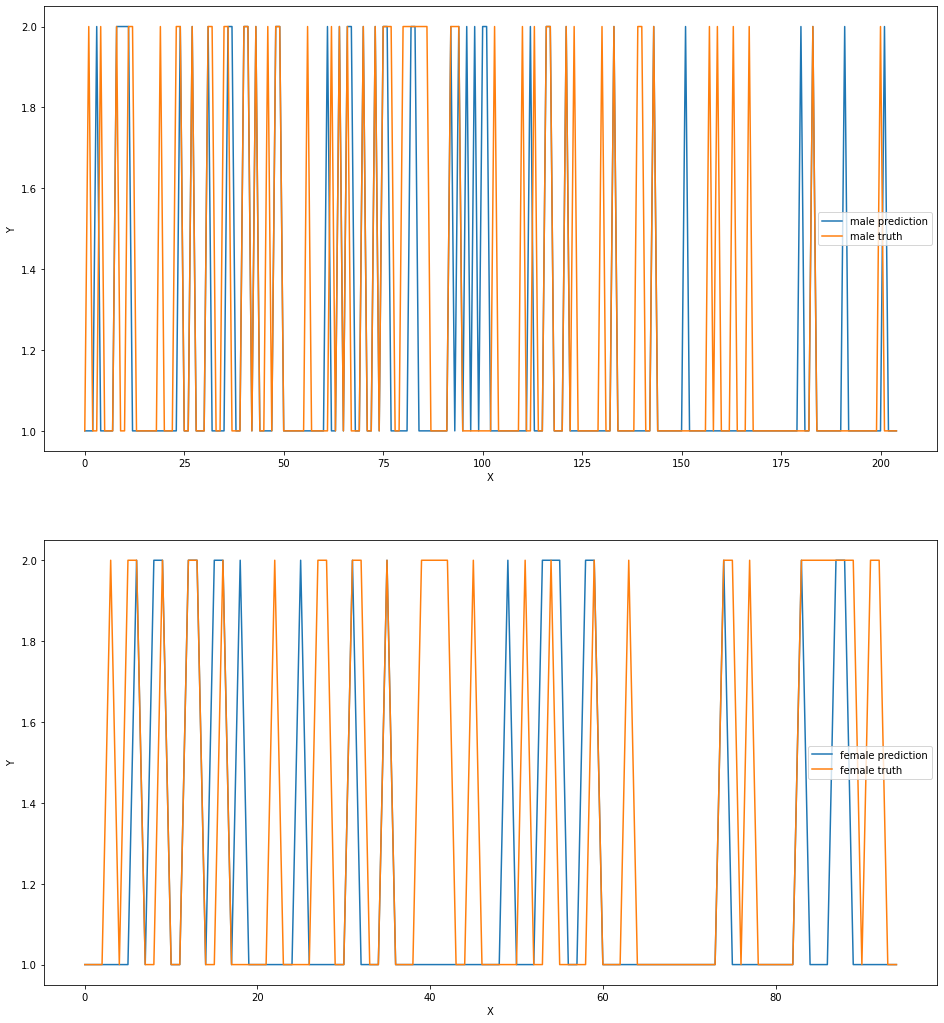

>> LOG:	 Model accuracy for male applicants test =  0.7853658536585366
>> LOG:	 Model MSE for male applicants test =  0.2146341463414634
>> LOG:	 Model recall score for male applicants test =  0.8993288590604027
>> LOG:	 Model precision score for male applicants test =  0.8220858895705522
-------------------------------------------------------
>> LOG:	 Model accuracy for female applicants test =  0.6947368421052632
>> LOG:	 Model MSE for female applicants test =  0.30526315789473685
>> LOG:	 Model recall score for female applicants test =  0.8688524590163934
>> LOG:	 Model precision score for female applicants test =  0.7162162162162162


In [49]:
y_pred_male = tuned_model.predict(x_test_male)
y_pred_female = tuned_model.predict(x_test_female)

x_axis_male =np.arange(y_pred_male.size)
x_axis_female =np.arange(y_pred_female.size)

fig, axs = plt.subplots(2)
fig.set_size_inches(h=18, w=16)

axs[0].plot(x_axis_male,y_pred_male,label='male prediction')
axs[1].plot(x_axis_female,y_pred_female,label='female prediction')
axs[0].plot(x_axis_male,y_test_male,label='male truth')
axs[1].plot(x_axis_female,y_test_female,label='female truth')
axs[0].set_xlabel('X')
axs[1].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[1].set_ylabel('Y')
axs[0].legend()
axs[1].legend()
plt.show()


log("Model accuracy for male applicants test = ",metrics.accuracy_score(y_test_male,y_pred_male))
log("Model MSE for male applicants test = ",metrics.mean_squared_error(y_test_male,y_pred_male))
log("Model recall score for male applicants test = ",metrics.recall_score(y_test_male,y_pred_male))
log("Model precision score for male applicants test = ",metrics.precision_score(y_test_male,y_pred_male))
print('-------------------------------------------------------')
log("Model accuracy for female applicants test = ",metrics.accuracy_score(y_test_female,y_pred_female))
log("Model MSE for female applicants test = ",metrics.mean_squared_error(y_test_female,y_pred_female))
log("Model recall score for female applicants test = ",metrics.recall_score(y_test_female,y_pred_female))
log("Model precision score for female applicants test = ",metrics.precision_score(y_test_female,y_pred_female))

As we see here model has higher accuracy  and less MSE for male applicants, moreover it appears to have more optimistic result on female group due to bigger precision rate. 